In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk

from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [2]:
df = pd.read_csv('Restaurant_revenue.csv')

# EDA

## Analysis of the data

**Identification of the target data**

In [3]:
df.columns

Index(['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Cuisine_Type',
       'Average_Customer_Spending', 'Promotions', 'Reviews',
       'Monthly_Revenue'],
      dtype='object')

The target data is the `Monthly_Revenue` column. This is the data that we want to predict.

**Number of rows and columns**

In [4]:
df.columns.value_counts().sum()

8

In [5]:
df.count()[0]

1000

There are 1000 rows and 8 columns in the dataset.

**Types of variables**

In [6]:
df.dtypes.value_counts()

float64    4
int64      3
object     1
dtype: int64

In [7]:
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


There are 4 variables of type `float64`:

* `Menu_Price`
* `Marketing_Spend`
* `Average_Customer_Spending`
* `Monthly_Revenue`

There are 3 variables of type `int64`:

* `Number_of_Customers`
* `Promotions`
* `Reviews`

There is 1 variable of type `object`:

* `Cuisine_Type`

**Missing values**

In [8]:
df.isna().sum().sum()

0

There are no missing values in the dataset.

**Target visualization**

The target data is a continuous variable. We can visualize the distribution of the target data using a histogram.

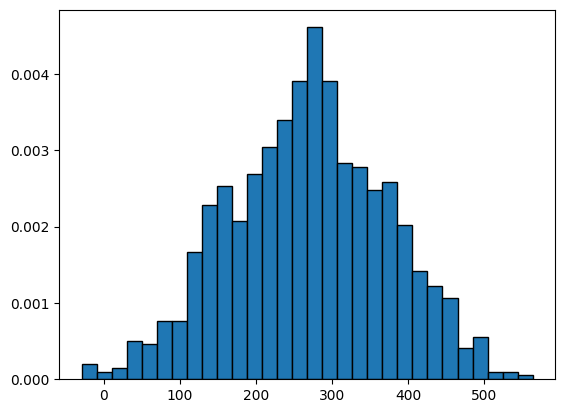

In [13]:
plt.hist(df['Monthly_Revenue'], bins=30, edgecolor='black',density=True);

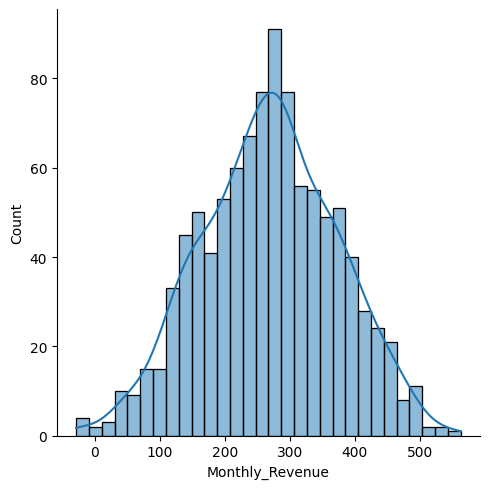

In [19]:
sns.displot(df['Monthly_Revenue'], bins=30, kde=True);

We can also have a descriptive statistics of the target data.

In [20]:
df["Monthly_Revenue"].describe()

count    1000.000000
mean      268.724172
std       103.982950
min       -28.977809
25%       197.103642
50%       270.213964
75%       343.395793
max       563.381332
Name: Monthly_Revenue, dtype: float64

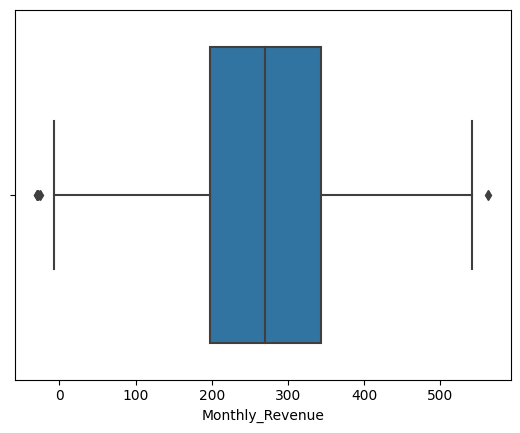

In [25]:
sns.boxplot(x=df['Monthly_Revenue']);

From this analysis, there are clearly something wrong with the target data. The minimum value is negative, which is not possible. This is a clear indication that the data is not clean and needs to be cleaned.

In [33]:
df.drop(df[df["Monthly_Revenue"]<0].index, inplace=True)
df

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,Japanese,19.033585,1,40,249.312034
996,31,20.615496,5.822885,Mexican,17.040990,0,57,110.228767
997,69,17.110656,4.141898,Japanese,44.649315,0,55,312.212552
998,73,37.664722,3.046556,Japanese,27.767358,0,23,272.482204


5 rows have been removed from the dataset because of the negative values in the target data.

**Understanding the input data**

As we saw earlier, the dataset contains 7 input data:

* `Menu_Price`: The price of the menu
* `Marketing_Spend`: The amount of money spent on marketing
* `Average_Customer_Spending`: The average amount of money spent by a customer
* `Number_of_Customers`: The number of customers the restaurant has
* `Promotions`: If the restaurant made promotions or not
* `Reviews`: The number of reviews the restaurant has
* `Cuisine_Type`: The type of cuisine of the restaurant

We will perform a statistical analysis for all the input data.

**`Menu_Price`**

In [34]:
df["Menu_Price"].describe()

count    995.000000
mean      30.234683
std       11.286305
min       10.009501
25%       20.384320
50%       30.852027
75%       39.894946
max       49.974140
Name: Menu_Price, dtype: float64

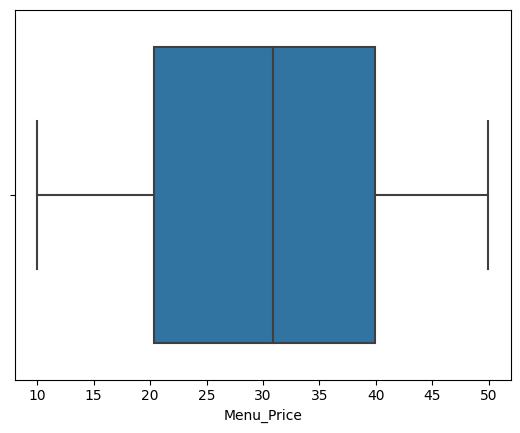

In [35]:
sns.boxplot(x=df['Menu_Price']);

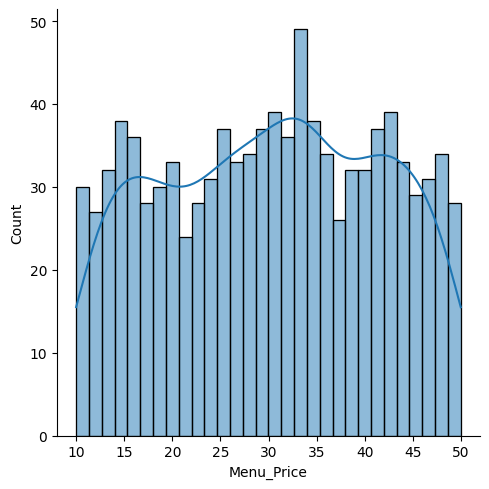

In [36]:
sns.displot(df['Menu_Price'], bins=30, kde=True);

**`Marketing_Spend`**

In [37]:
df["Marketing_Spend"].describe()

count    995.000000
mean       9.993658
std        5.837396
min        0.003768
25%        4.708948
50%       10.171586
75%       15.005803
max       19.994276
Name: Marketing_Spend, dtype: float64

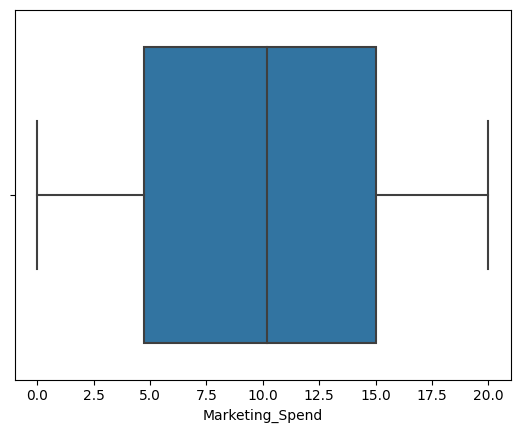

In [39]:
sns.boxplot(x=df['Marketing_Spend']);

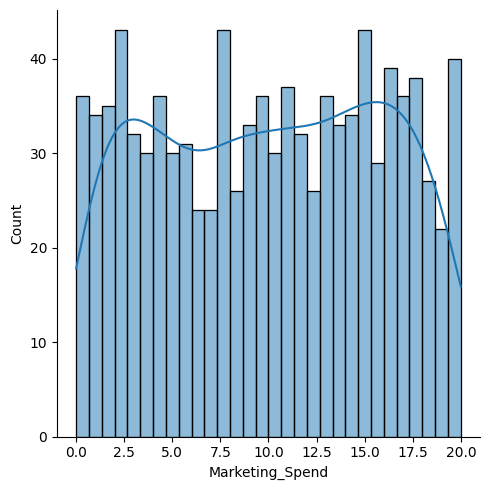

In [38]:
sns.displot(df['Marketing_Spend'], bins=30, kde=True);

**`Average_Customer_Spending`**

In [40]:
df["Average_Customer_Spending"].describe()

count    995.000000
mean      29.480918
std       11.473448
min       10.037177
25%       19.641153
50%       29.211770
75%       39.556699
max       49.900725
Name: Average_Customer_Spending, dtype: float64

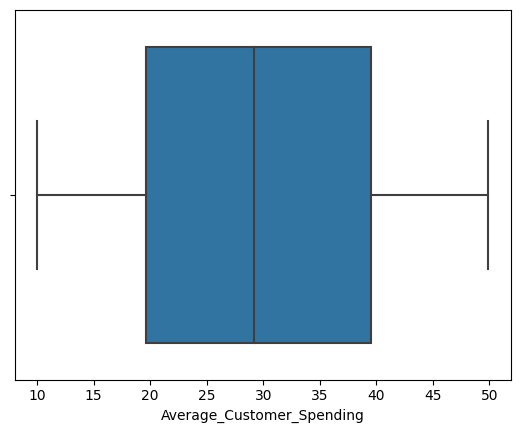

In [41]:
sns.boxplot(x=df['Average_Customer_Spending']);

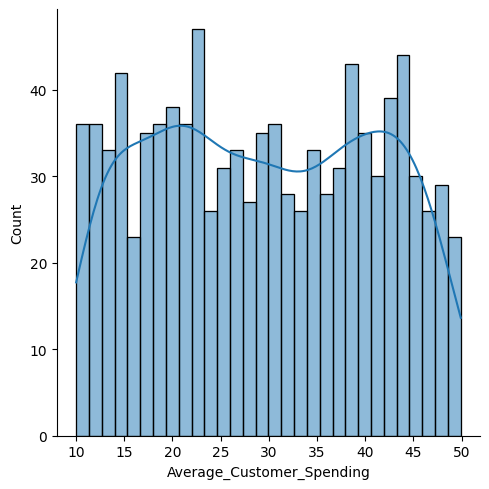

In [42]:
sns.displot(df['Average_Customer_Spending'], bins=30, kde=True);

**`Number_of_Customers`**

In [43]:
df["Number_of_Customers"].describe()

count    995.000000
mean      53.477387
std       26.268660
min       10.000000
25%       31.000000
50%       54.000000
75%       74.500000
max       99.000000
Name: Number_of_Customers, dtype: float64

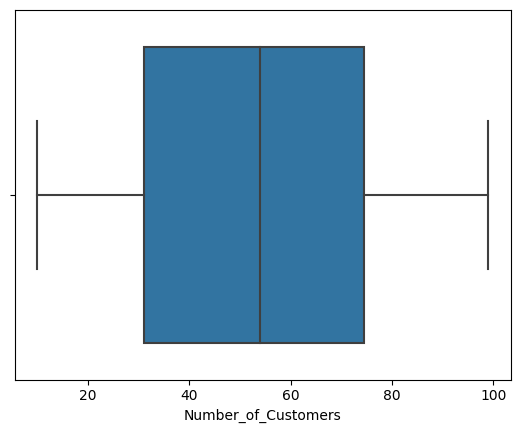

In [44]:
sns.boxplot(x=df['Number_of_Customers']);

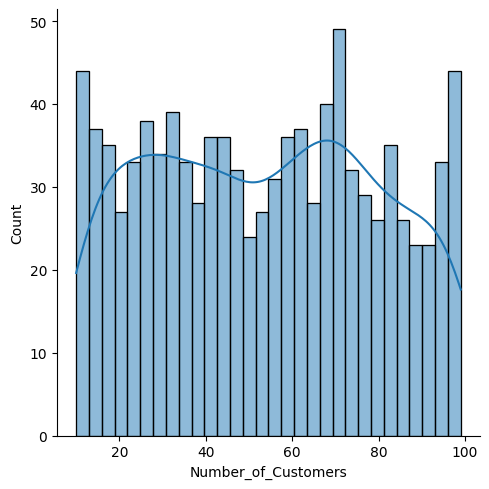

In [45]:
sns.displot(df['Number_of_Customers'], bins=30, kde=True);

**`Promotions`**

In [46]:
df["Promotions"].describe()

count    995.000000
mean       0.494472
std        0.500221
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Promotions, dtype: float64

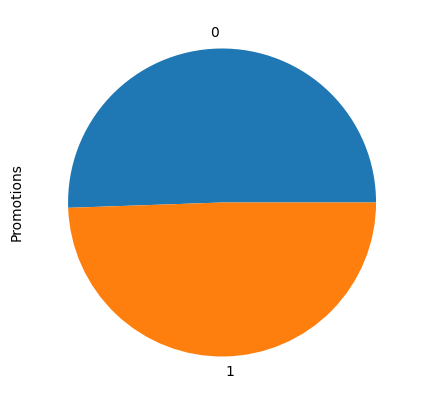

In [54]:
df["Promotions"].value_counts().plot(kind='pie',figsize=(5,5));

**`Reviews`**

In [49]:
df["Reviews"].describe()

count    995.000000
mean      49.875377
std       29.232925
min        0.000000
25%       24.000000
50%       50.000000
75%       76.000000
max       99.000000
Name: Reviews, dtype: float64

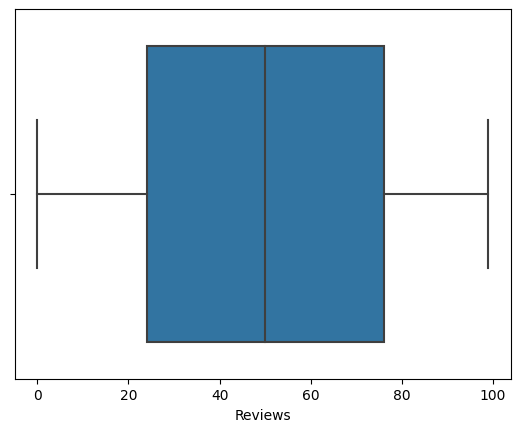

In [50]:
sns.boxplot(x=df['Reviews']);

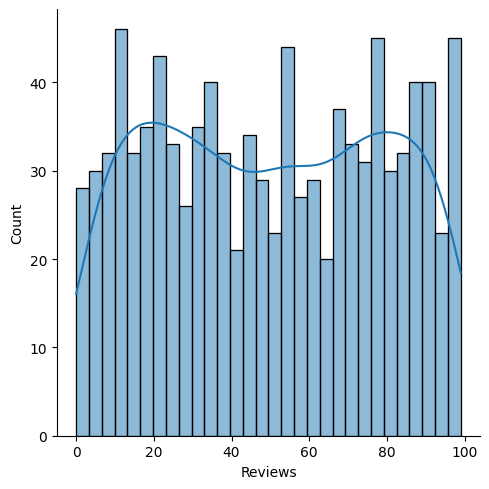

In [51]:
sns.displot(df['Reviews'], bins=30, kde=True);

**`Cuisine_Type`**

In [52]:
df["Cuisine_Type"].describe()

count          995
unique           4
top       Japanese
freq           262
Name: Cuisine_Type, dtype: object

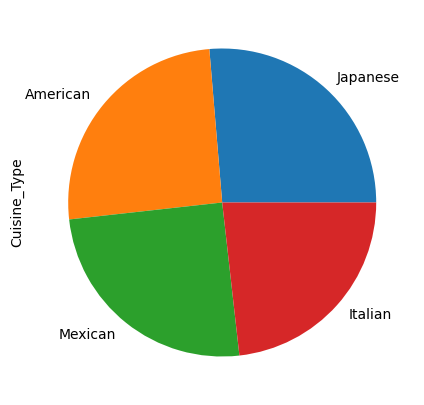

In [55]:
df["Cuisine_Type"].value_counts().plot(kind='pie',figsize=(5,5));

Now we can analyze the correlation between the input data and the target data.

<AxesSubplot:>

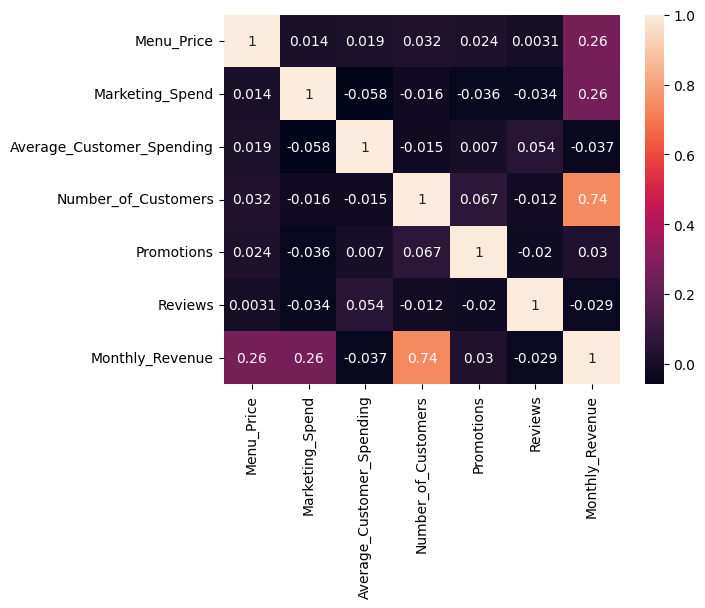

In [57]:
relevant_columns = ['Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Number_of_Customers', 'Promotions', 'Reviews',"Monthly_Revenue"]
sns.heatmap(df[relevant_columns].corr(),annot=True)

First, we notice that the `Number_of_Customers` variable is highly correlated followed by the `Menu_Price` and the `Marketing_Spend` variables.

## Conclusion of the EDA

The dataset is clean and ready for the next step. We have identified the target data and the input data. We have also performed a statistical analysis of the input data and the target data. We have also analyzed the correlation between the input data and the target data.

In the next step, we will train the models with all the input data and then with the most correlated input data.

# Model training

## Choosing the models

Our target data is a continuous variable. So we are trying to solve a regression problem.

To solve this problem, we will train 4 models:

* Random Forest

* Linear Regression

* SVM

* Gradient Boosting

But first, we need to split our model into a training set and a test set.

In [58]:
X,Y = df.drop('Monthly_Revenue',axis=1),df['Monthly_Revenue']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [60]:
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

In [61]:
regressors = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(),
    "SVR": SVR(),
    "GradientBoosting": GradientBoostingRegressor()
}

In [66]:
classes = {
    "Japanese": 0,
    "American": 1,
    "Mexican": 2,
    "Italian": 3
}
X_train[:,3] = [classes[cuisine] for cuisine in X_train[:,3]]

In [68]:
for regressor in regressors:
    regressors[regressor].fit(X_train,Y_train)
    training_score = cross_val_score(regressors[regressor],X_train,Y_train,cv=5)
    print("Regressors: ",regressor,"Has a training score of",round(training_score.mean(),2)*100,"% accuracy score")

Regressors:  LinearRegression Has a training score of 68.0 % accuracy score
Regressors:  RandomForest Has a training score of 63.0 % accuracy score
Regressors:  SVR Has a training score of 40.0 % accuracy score
Regressors:  GradientBoosting Has a training score of 64.0 % accuracy score


In [70]:
X_test[:,3] = [classes[cuisine] for cuisine in X_test[:,3]]

In [71]:
for regressor in regressors:
    Y_pred = regressors[regressor].predict(X_test)
    regressor_score = regressors[regressor].score(X_test,Y_test)
    print("Regressors: ",regressor,"Has a testing score of",round(regressor_score,2)*100,"% accuracy score")

Regressors:  LinearRegression Has a testing score of 65.0 % accuracy score
Regressors:  RandomForest Has a testing score of 59.0 % accuracy score
Regressors:  SVR Has a testing score of 40.0 % accuracy score
Regressors:  GradientBoosting Has a testing score of 59.0 % accuracy score


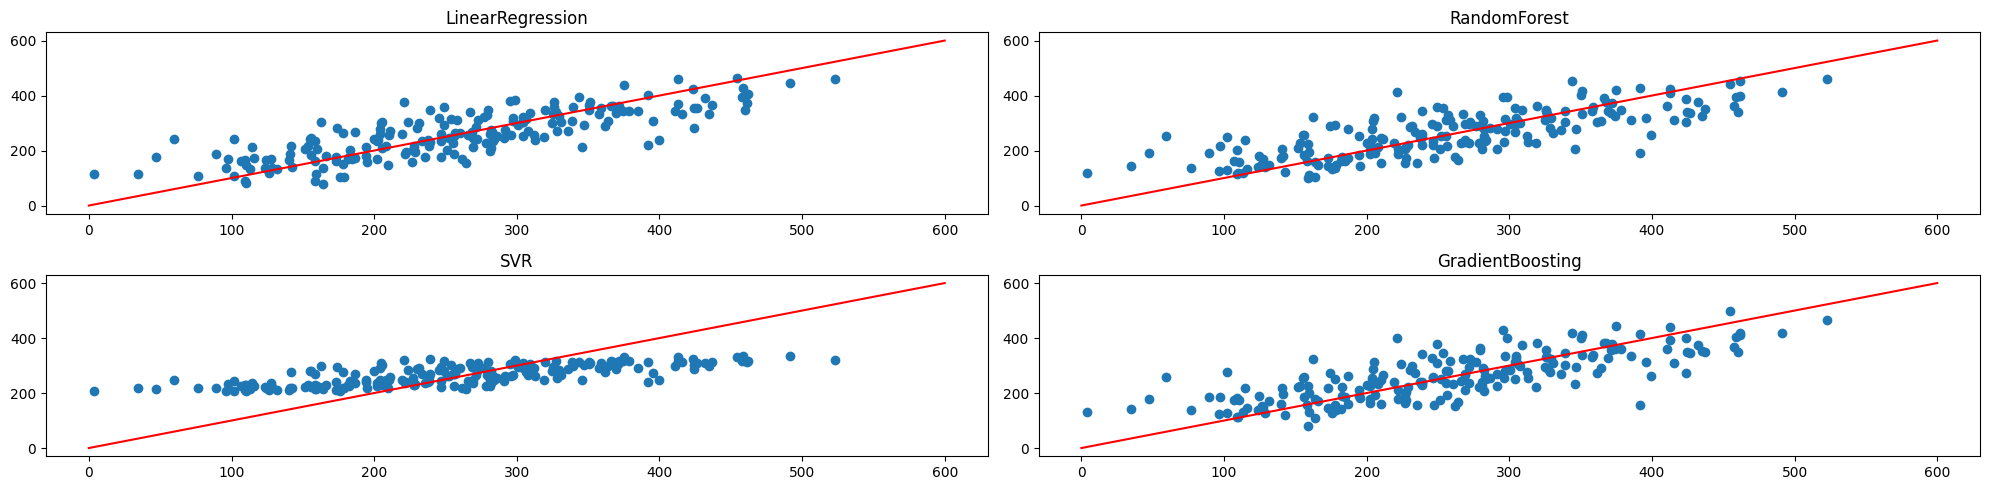

In [75]:
fig,axis = plt.subplots(2,2,figsize=(20,5))
n = 0
for regressor in regressors:
    i,j = divmod(n,2)
    axis[i,j].set_title(regressor)
    axis[i,j].scatter(Y_test,regressors[regressor].predict(X_test))
    axis[i,j].plot([0,600],[0,600],color='red')
    n+=1
fig.tight_layout()

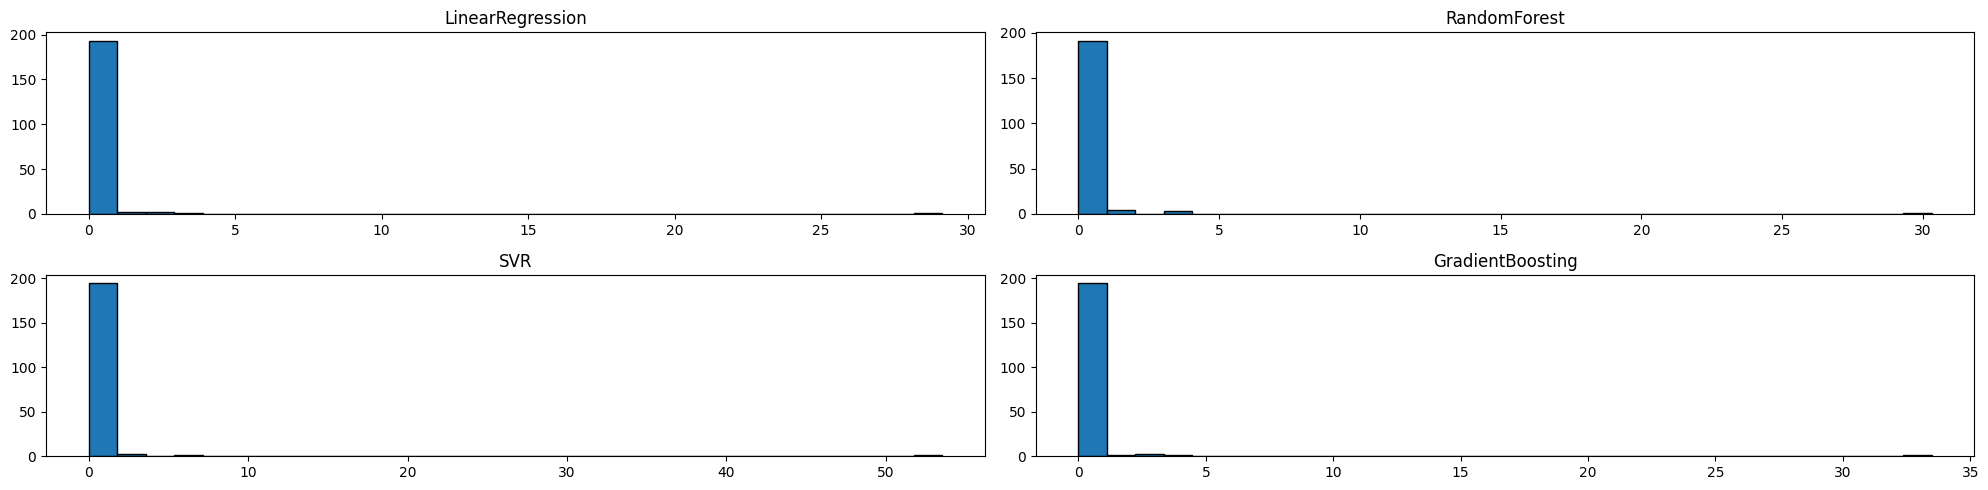

In [81]:
fig,axis = plt.subplots(2,2,figsize=(20,5))
n = 0
for regressor in regressors:
    i,j = divmod(n,2)
    axis[i,j].set_title(regressor)
    error = np.abs(Y_test-regressors[regressor].predict(X_test))/Y_test
    axis[i,j].hist(error,bins=30,edgecolor='black')
    n+=1
fig.tight_layout()

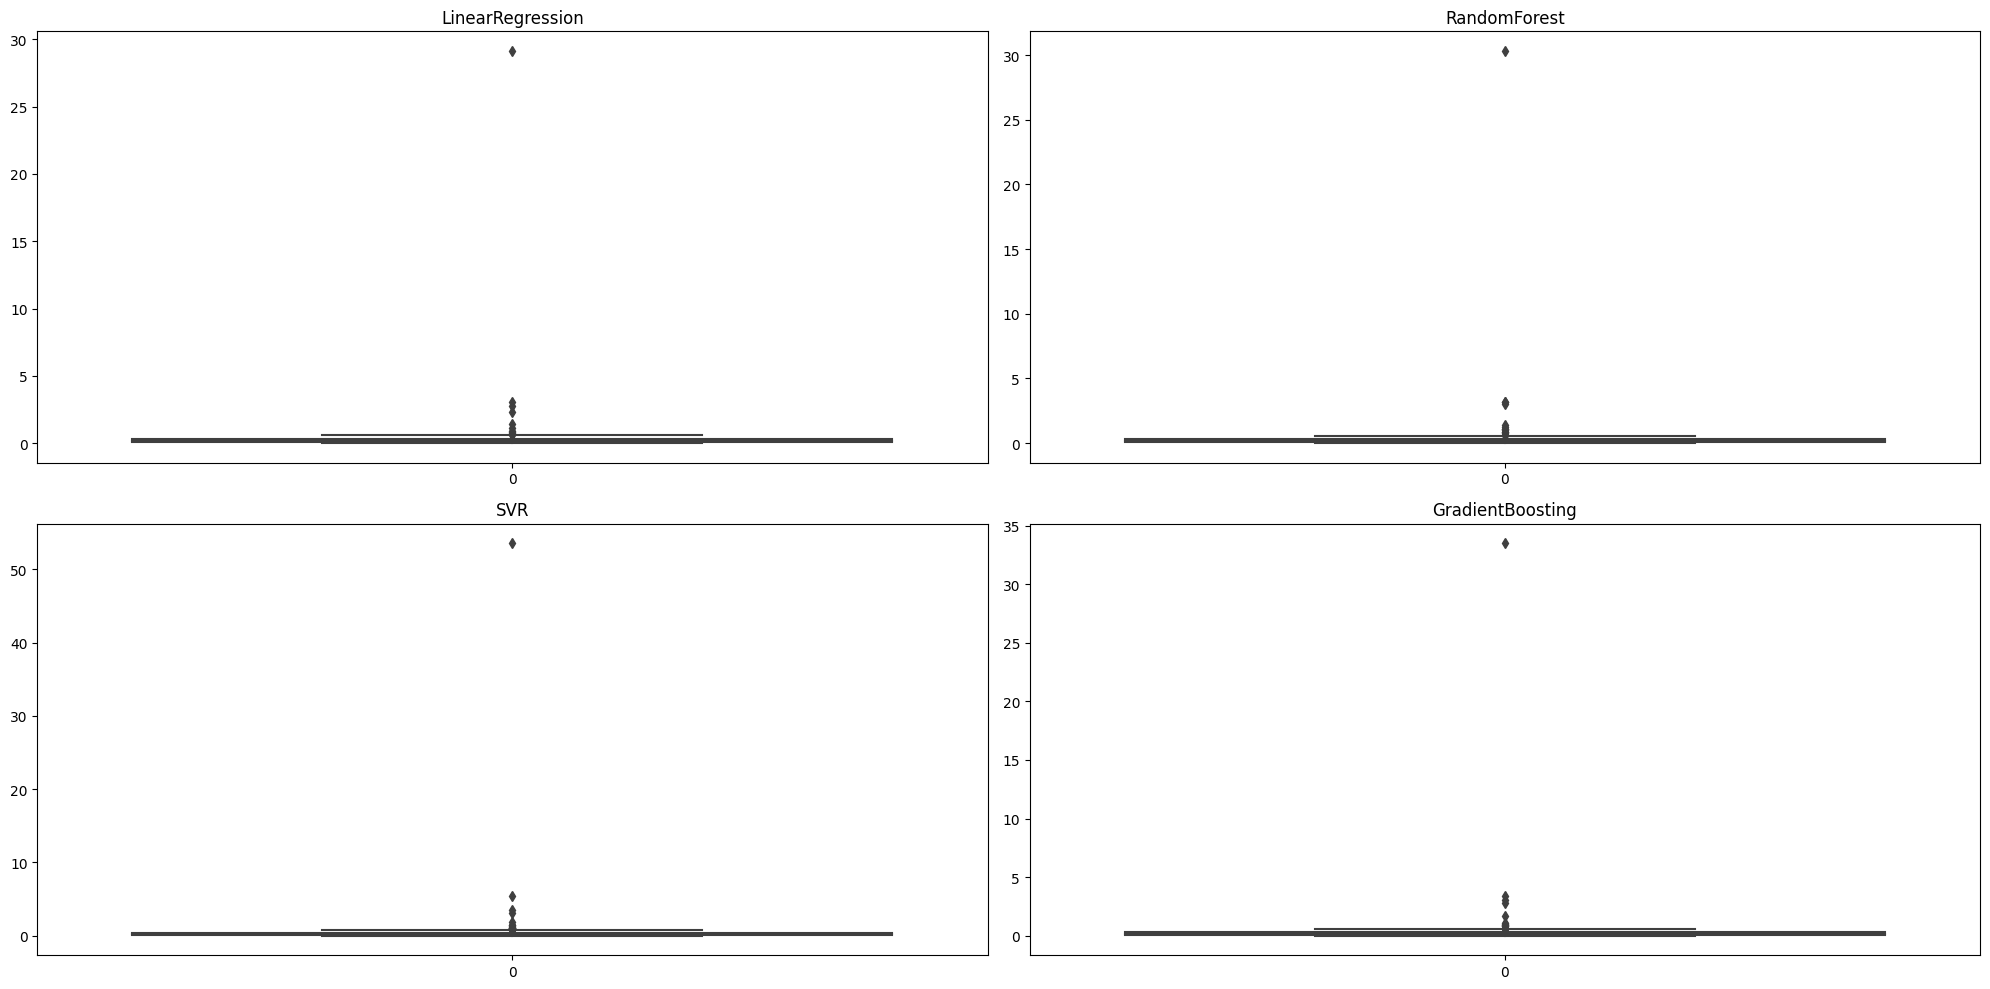

In [85]:
fig,axis = plt.subplots(2,2,figsize=(20,10))
n = 0
for regressor in regressors:
    i,j = divmod(n,2)
    axis[i,j].set_title(regressor)
    relative_error = np.abs(Y_test-regressors[regressor].predict(X_test))/Y_test
    # axis[i,j].hist(error,bins=30,edgecolor='black')
    sns.boxplot(relative_error,ax=axis[i,j])
    n+=1
fig.tight_layout()

## Hyperparameter tuning

The results are encouraging, but there are still great errors with up to 5000% of relative error. We will try to improve the models by tuning the hyperparameters and the input data.

In [91]:
X_train[:,[0,1,2]]

array([[71, 19.746268642554664, 5.379360631907719],
       [60, 30.388969870067925, 8.315950013749003],
       [33, 44.057945502050615, 7.354673016102198],
       ...,
       [16, 23.64360097896882, 5.7994023788721805],
       [25, 10.04480445920438, 16.874746528134487],
       [97, 33.48272896546269, 9.486722198124278]], dtype=object)

In [92]:
X_train2 = X_train[:,[0,1,2]]

In [97]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# param_linear = {
#     "degree":[1,2,3,4,5,6]
# }

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(StandardScaler(),PolynomialFeatures(degree), LinearRegression(**kwargs))

param_linear = {
    "polynomialfeatures__degree":np.arange(1,7)
}

grid_linear = sk.model_selection.GridSearchCV(PolynomialRegression(),param_linear,cv=5)
grid_linear.fit(X_train2,Y_train)
linear = grid_linear.best_estimator_

param_randomforest = {
    'n_estimators':[100,200,500],
    'max_depth':[4,5,6,7,8,None],
    'criterion':['squared_error','absolute_error']
}

grid_randomforest = sk.model_selection.GridSearchCV(RandomForestRegressor(),param_randomforest,cv=5,verbose=True,n_jobs=-1)
print("Hyperparameter tuning for Random Forest")
grid_randomforest.fit(X_train2,Y_train)
random_forest = grid_randomforest.best_estimator_

param_svr = {
    'C':[0.1,1,10,100],
    'kernel':['rbf','poly','sigmoid']
}

grid_svr = sk.model_selection.GridSearchCV(SVR(),param_svr,cv=5,verbose=True,n_jobs=-1)
print("Hyperparameter tuning for SVR")
grid_svr.fit(X_train2,Y_train)
svr = grid_svr.best_estimator_

param_gradientboosting = {
    'n_estimators':[100,200,300],
    'learning_rate':[0.1,0.01,0.001],
    'max_depth':[3,4,5,6]
}

grid_gradientboosting = sk.model_selection.GridSearchCV(GradientBoostingRegressor(),param_gradientboosting,cv=5,verbose=True,n_jobs=-1)
print("Hyperparameter tuning for Gradient Boosting")
grid_gradientboosting.fit(X_train2,Y_train)
gradient_boosting = grid_gradientboosting.best_estimator_

Hyperparameter tuning for Random Forest
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Hyperparameter tuning for SVR
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Hyperparameter tuning for Gradient Boosting
Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [99]:
best_models = {
    "LinearRegression": linear,
    "RandomForest": random_forest,
    "SVR": svr,
    "GradientBoosting": gradient_boosting
}

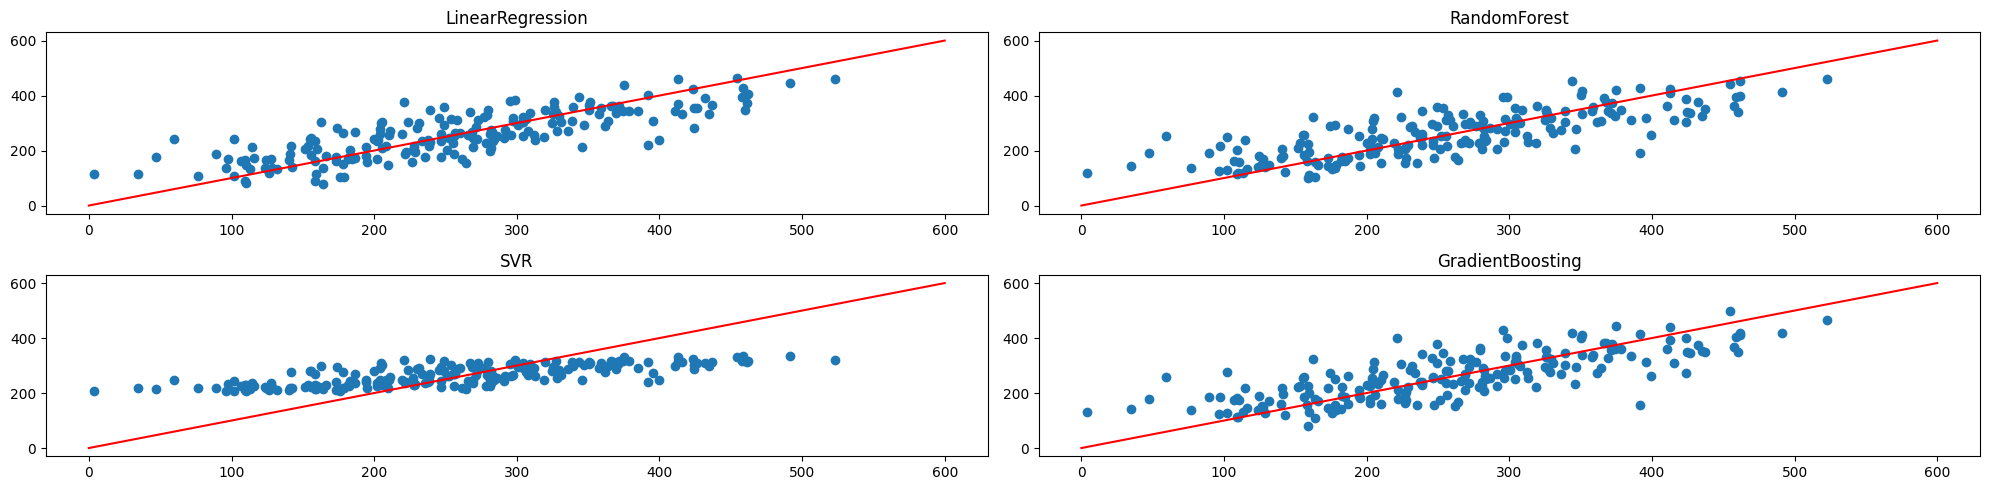

In [100]:
fig,axis = plt.subplots(2,2,figsize=(20,5))
n = 0
for regressor in best_models:
    i,j = divmod(n,2)
    axis[i,j].set_title(regressor)
    axis[i,j].scatter(Y_test,regressors[regressor].predict(X_test))
    axis[i,j].plot([0,600],[0,600],color='red')
    n+=1
fig.tight_layout()

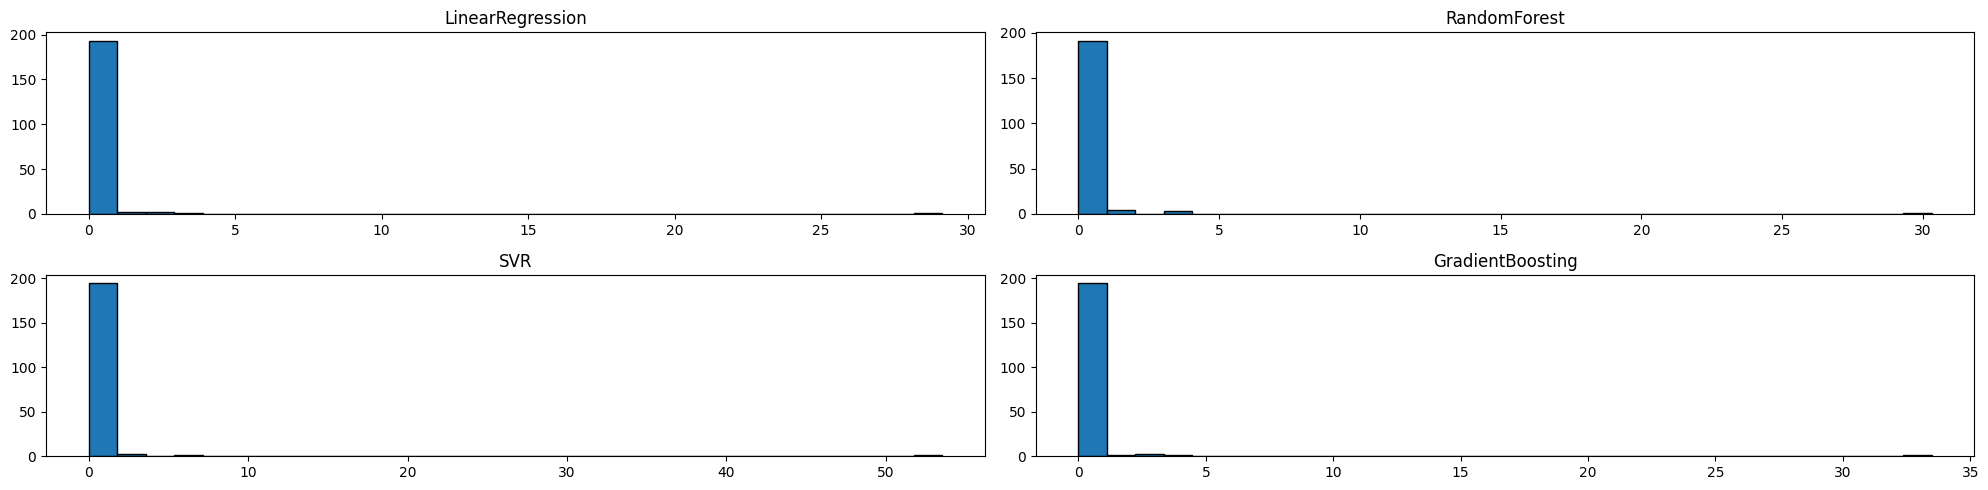

In [101]:
fig,axis = plt.subplots(2,2,figsize=(20,5))
n = 0
for regressor in regressors:
    i,j = divmod(n,2)
    axis[i,j].set_title(regressor)
    error = np.abs(Y_test-regressors[regressor].predict(X_test))/Y_test
    axis[i,j].hist(error,bins=30,edgecolor='black')
    n+=1
fig.tight_layout()

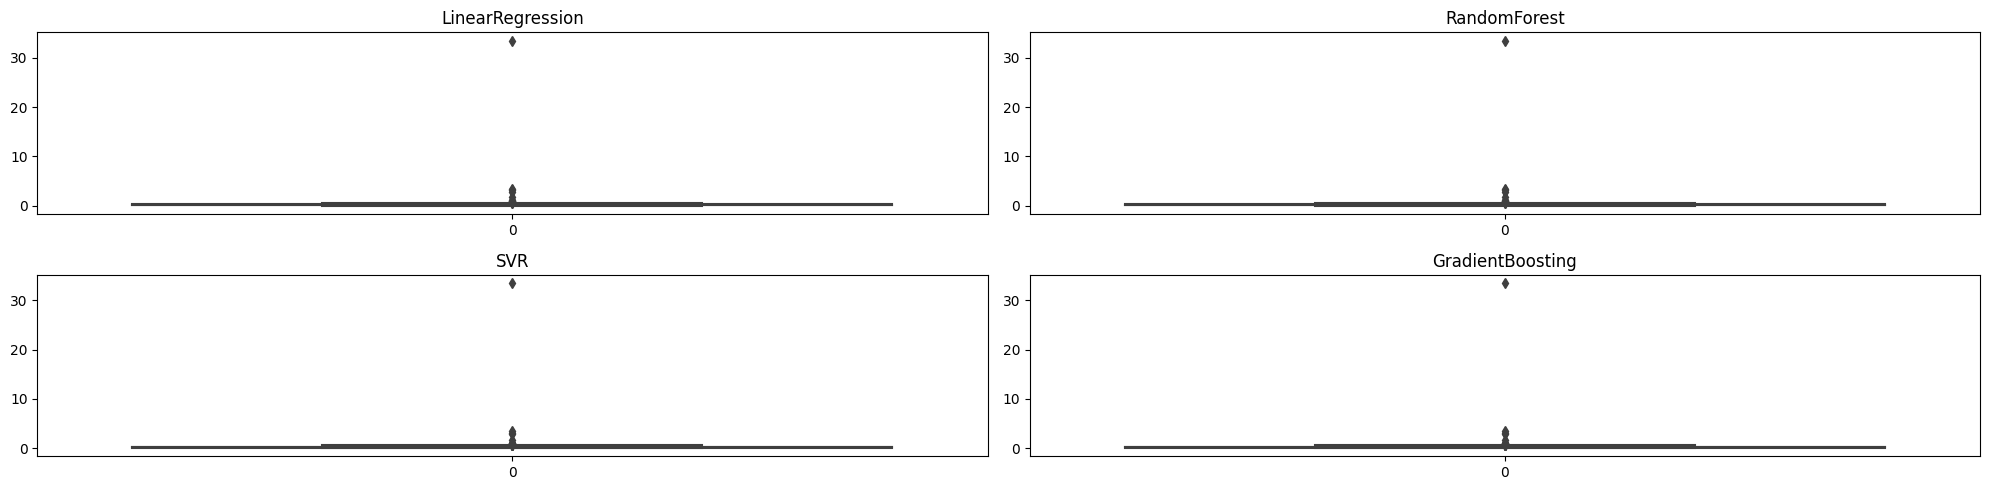

In [102]:
fig,axis = plt.subplots(2,2,figsize=(20,5))
n = 0
for regressor in regressors:
    i,j = divmod(n,2)
    axis[i,j].set_title(regressor)
    error = np.abs(Y_test-regressors[regressor].predict(X_test))/Y_test
    sns.boxplot(relative_error,ax=axis[i,j])
    n+=1
fig.tight_layout()